<a href="https://colab.research.google.com/github/goulartsursula/python-uerj/blob/master/projeto/bethe_bloch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto:** Interação da radiação com a matéria através da equação de Bethe-Bloch

**Autores:** Gabriela Gonçalves, Úrsula Goulart e Victor Soeiro.

**Última atualização:** 17/ 11/ 2020

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
c = 3e10  # Velocidade da luz [cm/s]
r_e = 2.818e-13  # Raio clássico do elétron [cm]
N_A = 6.022e23  # Número de avogadro [mol^-1]
p = 8.960  # Densidade do meio [g.cm^-3]
A = 63.546  # Massa atômica [g.mol^-1]
Z = 29  # Número atômico [adimensional]
z = 3.55  # Carga da partícula incidente [adimensional]
m_e = 0.5110  # Massa do elétron [MeV]
M = 105.7  # Massa da partícula incidente [MeV]  
e_I = 322  # Energia média de excitação [MeV]
K = 4 * np.pi * N_A * np.power(r_e, 2) * m_e  # [MeV cm^2 mol^-1]

Para diminuir a repetição de checagem dos tipos de dados em cada uma das funções criadas para o projeto, foi desenvolvido um decorador no Python com esse intuito. Esse decorador, faz com que a função seja aceita alguns tipos de dados, como listas e arrays do módulo Numpy.

In [ ]:
def func_argument_decorator(function):
    def wrapper(arg):
        if isinstance(arg, list):
            list_values = []
            for value in arg:
                list_values.append(function(value))

            return list_values

        if isinstance(arg, np.ndarray):
            for value in arg:
                if not isinstance(value, (np.float, np.int)):
                    raise ValueError(f"O tipo do argumento está incorreto: {arg} {type(arg)}")

        if isinstance(arg, (int, float, np.ndarray)):
            return function(arg)

        raise ValueError(f"O tipo do argumento está incorreto: {arg} {type(arg)}")

    return wrapper

Para o item (1) e o item (2) é necessário escrever uma função em Python chamada **def gamma(beta):** que tem como argumento $\beta$ e retorna $\gamma$, além de nos certificarmos que gamma(beta) pode aceitar um vetor $\beta$ e retornar um vetor compatível de $\gamma$.

In [ ]:
@func_argument_decorator
def gamma(beta):
    """
    Retorna o fator de Lorentz dado a velocidade relativa de um objeto à velocidade da luz.
    :param beta: Velocidade relativa de um objeto à velocidade da luz.
    :return: Fator de Lorentz.
    """
    return 1 / np.sqrt(1 - np.power(beta, 2))

In [ ]:
gamma(0.6)

1.25

In [ ]:
gamma([0.3, 0.5, 0.9])

[1.0482848367219182, 1.1547005383792517, 2.294157338705618]

In [36]:
gamma(np.linspace(0.1, 0.995, 50))

array([ 1.00503782,  1.00706757,  1.00945266,  1.01220059,  1.0153201 ,
        1.01882125,  1.02271557,  1.0270161 ,  1.03173754,  1.03689644,
        1.04251131,  1.04860284,  1.05519418,  1.06231111,  1.06998247,
        1.07824043,  1.08712098,  1.09666438,  1.10691581,  1.11792604,
        1.12975224,  1.14245904,  1.15611967,  1.17081743,  1.18664746,
        1.2037189 ,  1.22215755,  1.2421092 ,  1.2637438 ,  1.28726078,
        1.31289582,  1.3409297 ,  1.37169989,  1.40561603,  1.4431809 ,
        1.48501938,  1.53191916,  1.5848895 ,  1.64524794,  1.71475273,
        1.79581176,  1.89182706,  2.00779224,  2.15139655,  2.33523619,
        2.58174025,  2.93589502,  3.50636756,  4.66306449, 10.01252349])

Para o item (3) foi feito um gráfico *gamma* versus $\beta$ , ou seja, partindo de um vetor de valores $\beta$ variando de 0 a 0,995. 

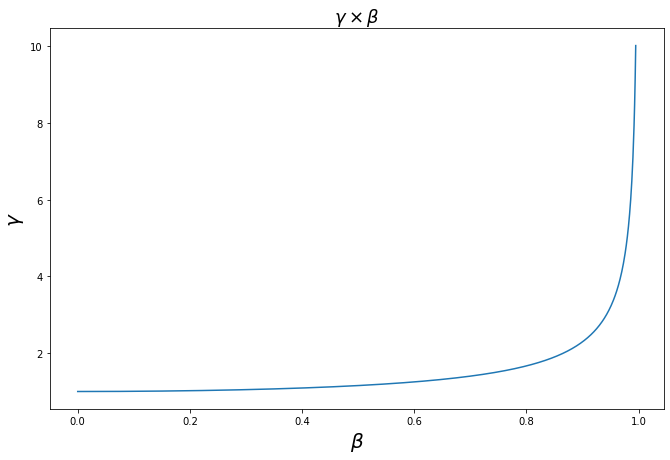

In [57]:
b = np.linspace(0, 0.995, 1000)
g = gamma(b)

plt.plot(b, g)
plt.xlabel(r'$\beta$', fontsize = 20)
plt.ylabel(r'$\gamma$', fontsize = 20)
plt.title(r'$\gamma \times \beta$', fontsize = 18)

plt.show()

Para o item (4) é solicitado que seja feito um gráfico $\gamma \beta$ *versus* $\beta$, contudo, para que isso seja possível, é necessário criar a função *get_beta* que retorna $\beta$, adotando uma relação com $\beta \gamma$

In [ ]:
@func_argument_decorator
def get_beta(beta_gamma):
    """
    Usando a propriedade
    gamma^2 = (gamma * beta)^2 + 1
    retorna o valor de beta dado o seu produto com gamma.
    :param beta_gamma: Produto de Gamma e Beta.
    :return: Beta.
    """
    return beta_gamma / np.sqrt(np.power(beta_gamma, 2) + 1)

In [ ]:
get_beta(10.9)

0.9958179810075175

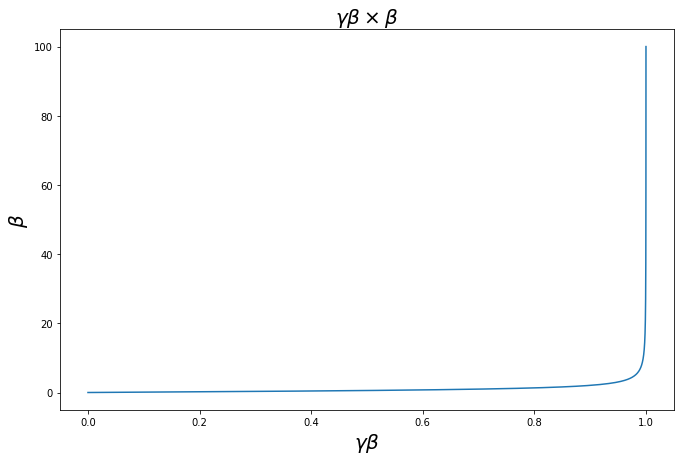

In [38]:
gb = np.linspace(0, 100, 1000)
b = get_beta(gb)

plt.plot(b, gb)
plt.xlabel(r'$\gamma \beta$', fontsize =20)
plt.ylabel(r'$\beta$', fontsize =20)
plt.title(r'$\gamma \beta \times \beta$', fontsize =20)

plt.show()

Para o item (5) é necessário traçar o argumento do logaritmo natural na equação de Bethe-Block em uma função de $\gamma \beta$. Fazer com que o argumento seja uma nova função **ln_argument()**. 

Ao plotar essa função deve aceitando $\beta$ ou $\gamma$ ou seu produto ($\beta \gamma$) como um argumento. Foi possível observar que pode ser muito difícil obter $\beta$ com uma boa precisão a partir $\gamma$ em baixas velocidades; o oposto é difícil em velocidades muito altas. Faça o gráfico para um intervalo de 0,1 a 100.

In [ ]:
@func_argument_decorator
def ln_argument(beta_gamma):
    """
     Calcula o argumento do logaritmo natural da função de Bethe-Bloch.
     :param beta_gamma: O produto de beta e gamma.
     :return: O argumento do logaritmo natural da função de Bethe-Bloch
     """
    return 2 * m_e * np.power(beta_gamma, 2) / e_I

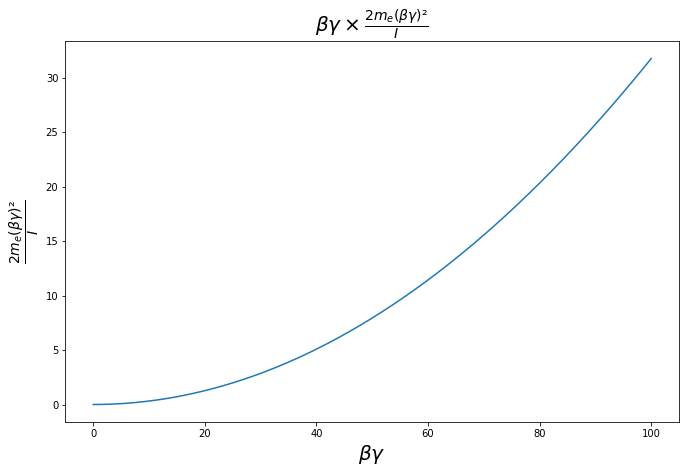

In [41]:
gb = np.linspace(0, 100, 1000)
arg = ln_argument(gb)

plt.plot(gb, arg)
plt.xlabel(r'$\beta\gamma$', fontsize = 20)
plt.ylabel(r'$\frac{2m_e(\beta \gamma)²}{I}$', fontsize = 20)
plt.title(r'$\beta\gamma \times \frac{2m_e(\beta \gamma)²}{I}$', fontsize = 20)

plt.show()

Pela equação do fator de Lorentz nota-se que se o valor de $\beta$ for um valor muito pequeno ficará muito dificil determinar um valor para $\gamma$. Então torna-se interessante utilizar o argumento da função como o produto $\gamma \beta$, afinal podemos variá-lo sem nos preocuparmos com essa precisão.

Esse gráfico não mostra a região interessante para valores baixos de $\beta$. É necessário fazer o *plot* com uma escala logarítmica.

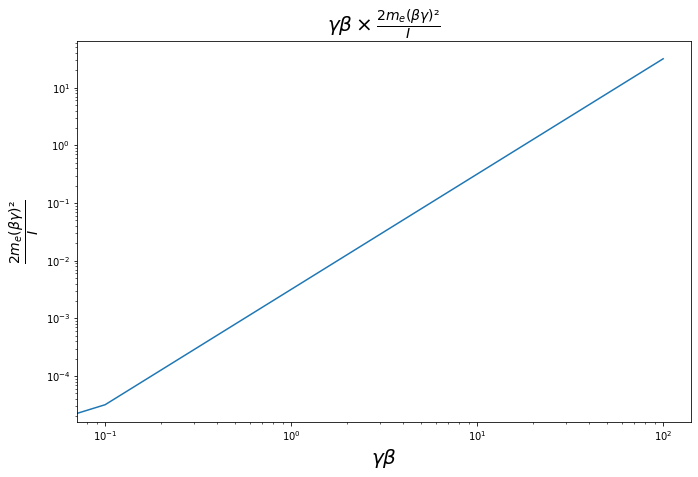

In [42]:
gb = np.linspace(0, 100, 1000)
arg = ln_argument(gb)

plt.loglog(gb, arg)
plt.xlabel(r'$\gamma \beta$', fontsize = 20)
plt.ylabel(r'$\frac{2m_e(\beta \gamma)²}{I}$', fontsize = 20)
plt.title(r'$\gamma \beta \times \frac{2m_e(\beta \gamma)²}{I}$', fontsize = 20)

plt.show()

Para o item 8 é necessário plotar o conteúdo dos colchetes versus $\gamma \beta$ usando o mesmo espaçamento do vetor de log para o argumento x. Para termos números reais de $e_I$, escolher múons que penetram em um absorvedor de cobre. Esse é um número adimensional que pode variar de 3,55 a mais
de 16.

In [ ]:
@func_argument_decorator
def brackets_argument(beta_gamma):
    return np.log(ln_argument(beta_gamma)) - np.power(get_beta(beta_gamma), 2)

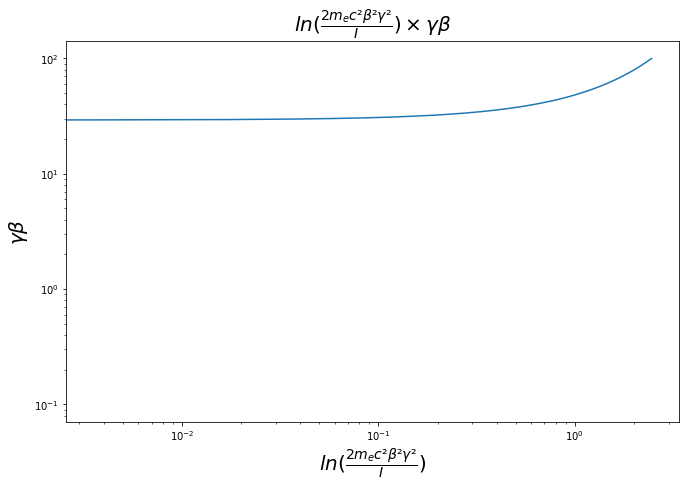

In [49]:
gb = np.linspace(0.1, 100, 1000)
brackets = brackets_argument(gb)

plt.loglog(brackets, gb)
plt.xlabel(r'$ln(\frac{2m_ec²\beta²\gamma²}{I})$', fontsize = 20)
plt.ylabel(r'$\gamma \beta$', fontsize = 20)
plt.title(r'$ln(\frac{2m_ec²\beta²\gamma²}{I}) \times \gamma\beta$', fontsize = 20)

plt.show()

In [ ]:
@func_argument_decorator
def bethe_bloch(beta_gamma):
    return K * p * np.power(z, 2) * (Z/A) * (1/np.power(get_beta(beta_gamma), 2)) * brackets_argument(beta_gamma)

In [27]:
bethe_bloch(100)

38.89479652708482

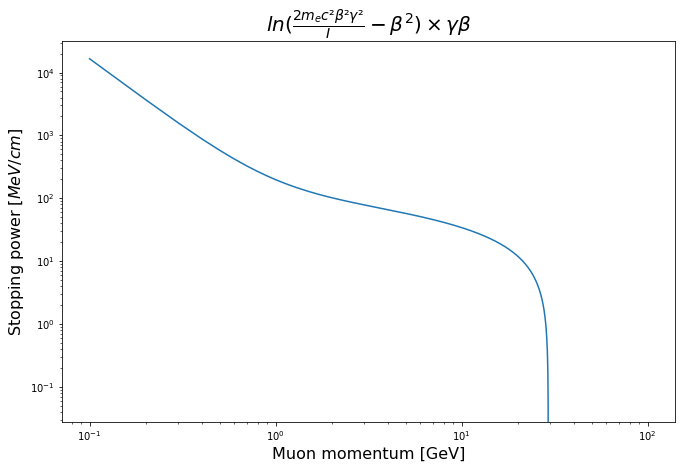

In [56]:
x = np.linspace(0.1, 100, 1000)
y = -bethe_bloch(x)

plt.loglog(x, y)
plt.xlabel(r'Muon momentum [GeV]', fontsize = 16)
plt.ylabel(r'Stopping power $ [MeV/cm]$', fontsize = 16)
plt.title(r'$ln(\frac{2m_ec²\beta²\gamma²}{I} - \beta^2) \times \gamma\beta$', fontsize = 20)

plt.show()